In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\USER\Downloads\logisticregression\titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

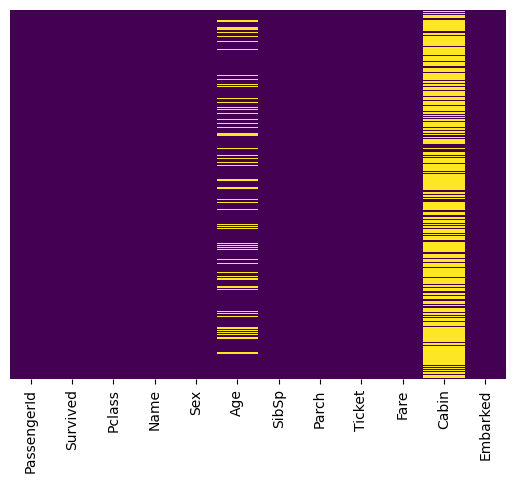

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\3244659738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train,x='Survived',palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

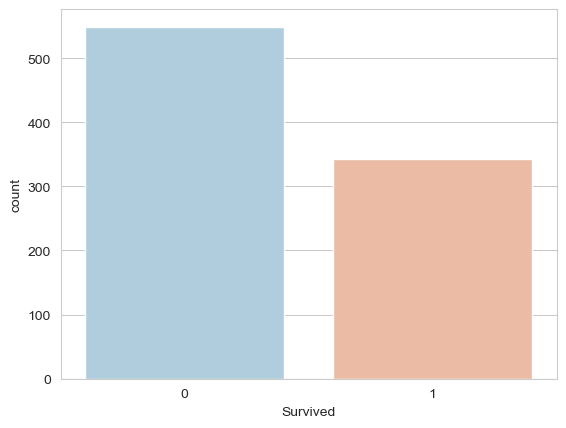

In [18]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

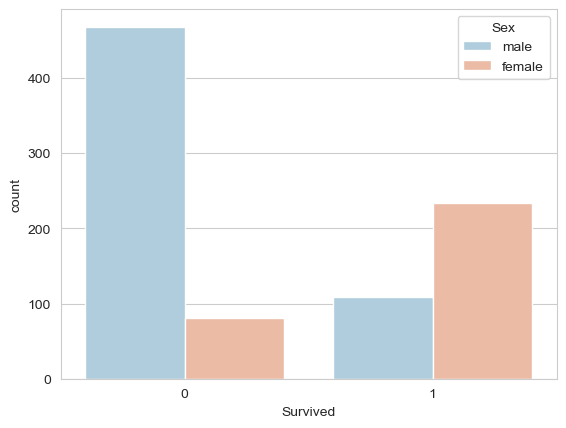

In [21]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

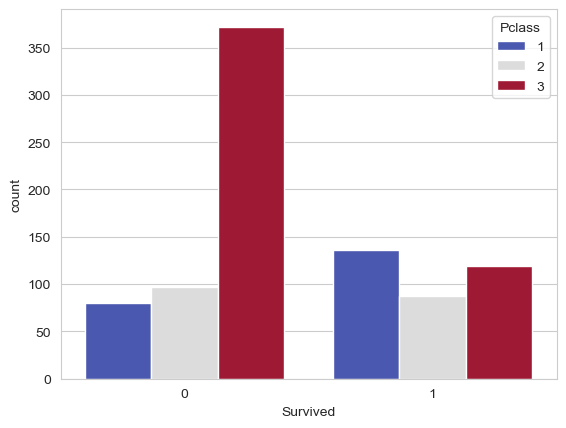

In [24]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',hue='Pclass',palette='coolwarm')

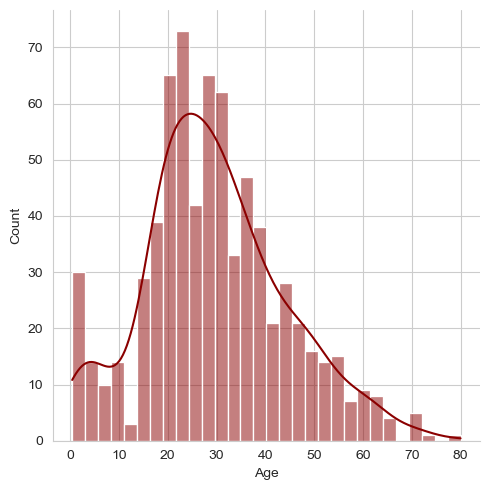

In [33]:
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=30)

<Axes: >

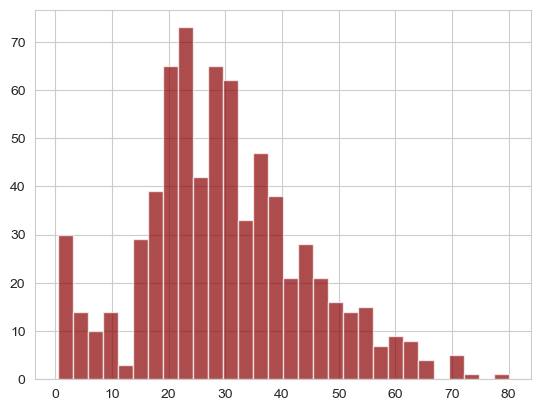

In [35]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\495980066.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

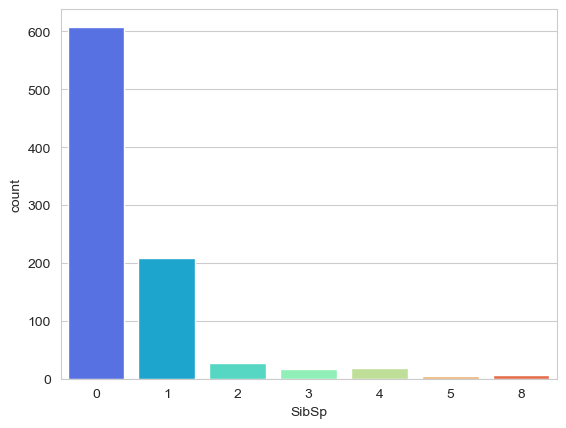

In [39]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

<Axes: >

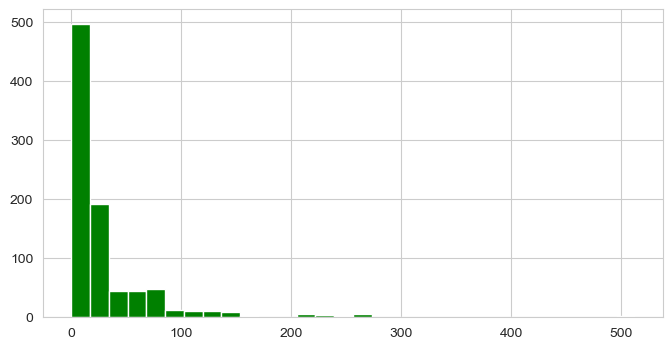

In [45]:
train['Fare'].hist(color='green',bins=30,figsize=(8,4))

In [46]:
!pip install cufflinks

In [48]:
import cufflinks as cf
cf.go_offline()

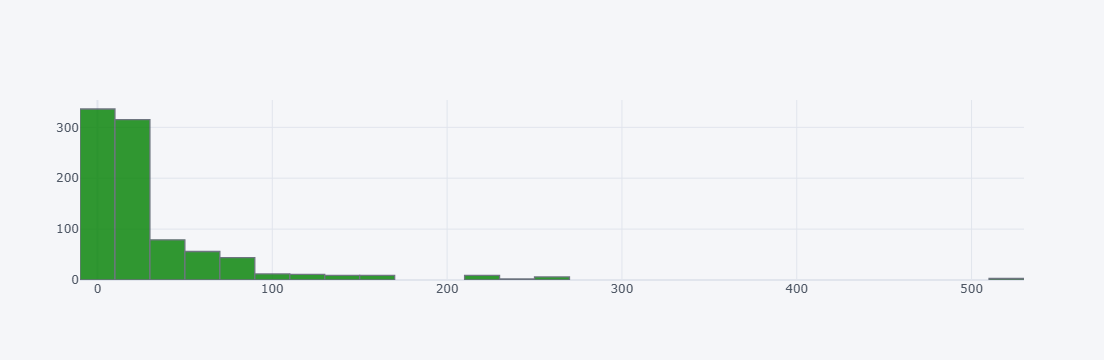

In [50]:
train['Fare'].iplot(kind='hist',color='green',bins=40)

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\4135693399.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

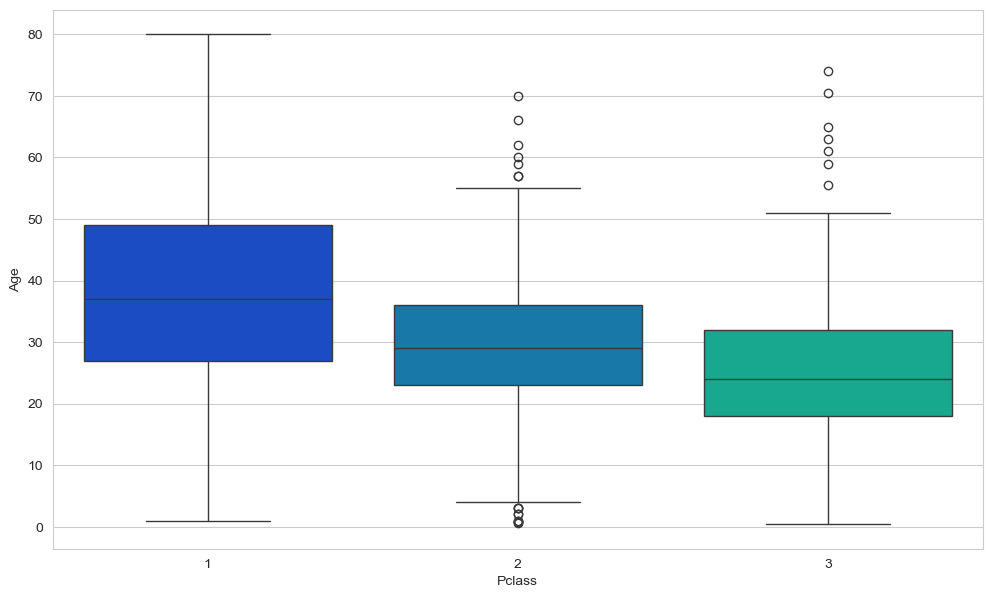

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [53]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Age']

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_6464\822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

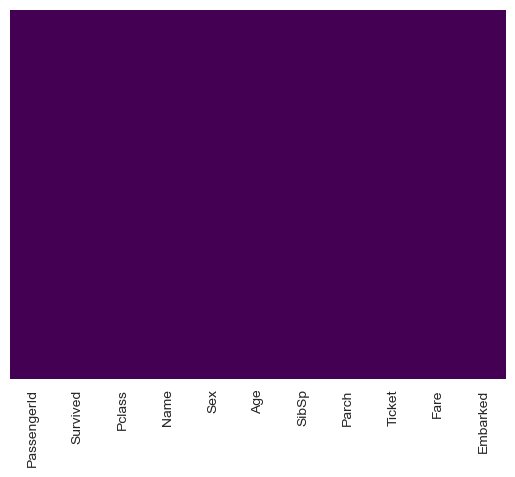

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
train.drop('Cabin',inplace=True,axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
train.dropna(inplace=True)

In [60]:
#Converting Categorical Features
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [61]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [62]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [63]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [64]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [65]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
train=pd.concat([train,sex,embarked],axis=1)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [68]:
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.2,random_state=0)

In [71]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
364,365,3,24.0,1,0,15.5000,True,True,False
256,257,1,37.0,0,0,79.2000,False,False,False
477,478,3,29.0,1,0,7.0458,True,False,True
272,273,2,41.0,0,1,19.5000,False,False,True
554,555,3,22.0,0,0,7.7750,False,False,True
...,...,...,...,...,...,...,...,...,...
837,838,3,24.0,0,0,8.0500,True,False,True
193,194,2,3.0,1,1,26.0000,True,False,True
630,631,1,80.0,0,0,30.0000,True,False,True
560,561,3,24.0,0,0,7.7500,True,True,False


In [72]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
14,15,3,14.0,0,0,7.8542,False,False,True
159,160,3,24.0,8,2,69.5500,True,False,True
763,764,1,36.0,1,2,120.0000,False,False,True
741,742,1,36.0,1,0,78.8500,True,False,True
483,484,3,63.0,0,0,9.5875,False,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
673,674,2,31.0,0,0,13.0000,True,False,True
182,183,3,9.0,4,2,31.3875,True,False,True
632,633,1,32.0,0,0,30.5000,True,False,False


In [73]:
y_train

364    0
256    1
477    0
272    1
554    1
      ..
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 711, dtype: int64

In [74]:
y_test

14     0
159    0
763    1
741    0
483    1
      ..
886    0
673    1
182    0
632    1
141    1
Name: Survived, Length: 178, dtype: int64

In [82]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression

In [83]:
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [84]:
pred=regressor.predict(x_test)

In [85]:
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [86]:
#Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



In [88]:
confusion_matrix(y_test,pred)

array([[85, 20],
       [31, 42]], dtype=int64)